In [10]:
import pandas as pd
import seaborn as sns

%matplotlib inline

In [11]:
original = pd.read_csv("data/titanic/train.csv", index_col='PassengerId')

In [12]:
original.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
original.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [14]:
data = original.copy()

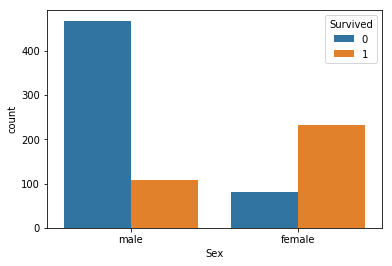

In [15]:
sns.countplot('Sex', hue='Survived', data=data)

In [16]:
data[data.Cabin.notnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C


В титаник кабините са започвали с латинска буква (A-G) описваща на коя пауба се намира кабината
Паубите са разположени хоризонтално, като A е най-близо до най-горната пауба, откъдето вероятно са се пускали лодките
Жалко е, че толкова много записи са се изгубили, но вероятно класите имат нещо общо с кабините (първа е по-нагоре)
Ако станем много отчаяни е едно нещо, което може да се пробва, въпреки, че ако влезе като feature донякъде ще дублира класите донякъде

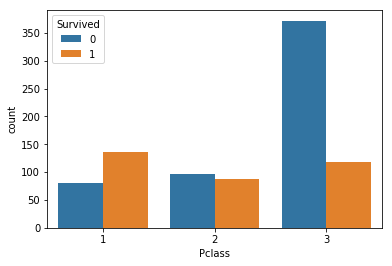

In [17]:
sns.countplot('Pclass', hue='Survived', data=data)

същия извод, като в презентацията - класата донякъде спасява, вероятно заради паубата - най-долните също така вероятно са потънали най-бързо

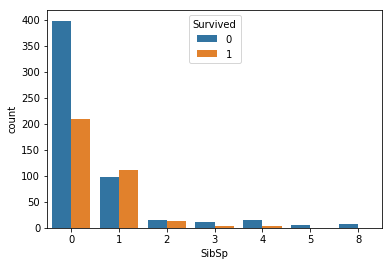

In [18]:
sns.countplot('SibSp', hue='Survived', data=data)

Виждаме (отново като в презентацията), че да си сам не е оферта, с една "братосестра" или мъж или жена е малко по-добре, 2 - средна работа и оттам нататък - зле
Възможно е dataset-а да е много малък, за да можем да кажем много за хората с повече от 1 SibSp, понеже представителните извадки оттам нататък са много малки - по-скоро може би ще оувърфитнем в тази посока, но може после да проверим
Повечето от 1 вероятно са женените - може би щеше да е по-полезно ако това беше отделна колона

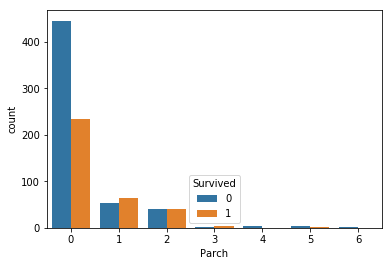

In [19]:
sns.countplot('Parch', hue='Survived', data=data)

същото - много малко представители от 3 нагоре, за един и двама данните се повтарят, но в три сякаш зависимостта е наобратно (обаче пак имаме проблема, че данните са малко)

In [20]:
print(data[data.Parch > 2].shape)
print(data[data.SibSp > 2].shape)

(15, 11)
(46, 11)


Най-вероятно каквото и да решим да правим с тези колони ще е по-скоро предположение
Ако направим колона за големите семейства в много голям тестов сет може би ще оувърфитнем

In [21]:
data[data.Parch > 2]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S
168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S
438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.7500,NaN,S
439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S


И въпреки това предположението, че повечето хора тук са 3-та класа (даже не 2-ра или 3-та а най-вече 3-та) изглежда вярно

In [22]:
data[data.Name.str.contains("Andersson")].shape

(9, 11)

имах съмнение дали има толкова Andersson-овци

In [23]:
data[(data.SibSp > 2) & (data.Pclass == 3)].shape

(42, 11)

което пак явно важи и за хората с много родители и деца, там

In [24]:
data[data.Age.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C


Просто за да видим как изглеждат хората за които не знаем възрастта - май пак са повече от трета класа
И като цяло за доста неща отговора е "явно повечето са 3-та класа" - да видим какви са ни представителните извадки

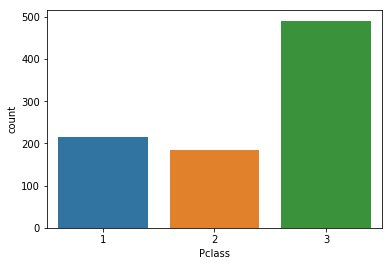

In [25]:
sns.countplot('Pclass', data=data)

трета класа е може би по-голяма от другите две взети заедно

In [26]:
(data[data.Pclass == 3]).shape[0] - (data[(data.Pclass == 1) | (data.Pclass == 2)]).shape[0]

91

3-та класа са много повече от останалите

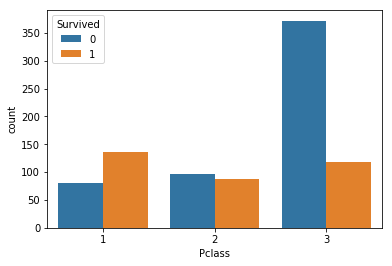

In [27]:
sns.countplot('Pclass', hue='Survived', data=data)

Съотношението си седи обаче - трета класа е много по-зле от първа като съотношение
По-голямата част от 3-та класа е била на най-долните пауби, които вероятно са се наводнили най-бързо, първо и второ са били най-далаче от горната пауба, където са били лодките (всички без две от тях са били там)

In [28]:
data[(data.Cabin.notnull()) & (data.Pclass == 1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


Това е доста повече от това, което очаквах - пътниците първа класа са малко в сравнение с останалите

In [29]:
data[(data.Cabin.isnull()) & (data.Pclass == 1)].shape

(40, 11)

3/4-ти от пътниците от първа класа имат документирани кабини
Дали ако ги разделим на пауби ще има връзка с оцеляеваемостта

In [30]:
data['Deck'] = data.Cabin.fillna("").str.extract('\A([A-G])', expand=False)

In [31]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Deck        688
dtype: int64

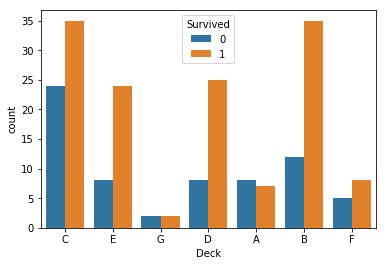

In [32]:
sns.countplot('Deck', hue='Survived', data=data[data.Deck.notnull()])

Имайки предвид, че повечето са хора от първа класа и повечето хора от първа класа оцеляват това може би не е толкова изненадващо. И все пак е малко разочароващо, че на пауба A (която смятах за най-спасяваща) има толкова среден резултат
Ако сечението на документираните кабини и хората от първа класа е толкова голямо обаче остава притеснителния въпрос как да направим представителна извадка на останалите 30-40 пътника (може би все пак има място за някакъв отчаян опит с уикипедия)

In [33]:
data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand=False)
data.loc[data.Title == 'Mlle', 'Title'] = 'Miss'
data.loc[data.Title == 'Mme', 'Title']  = 'Mrs'
data.loc[data.Title == 'Ms', 'Title']   = 'Miss'

rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Don', 'Jonkheer', 'Capt', 'Lady', 'Sir']
data.Title = data.Title.replace(rare_titles, 'Rare')

понеже подобряваме модела ще открадна някои идеи от презентацията

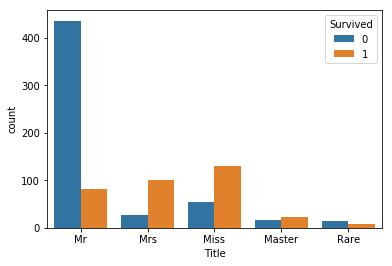

In [34]:
sns.countplot('Title', hue='Survived', data=data)

In [35]:
age_by_title = data.groupby('Title').Age.mean()
age_by_title

Title
Master     4.574167
Miss      21.845638
Mr        32.368090
Mrs       35.788991
Rare      45.545455
Name: Age, dtype: float64

In [36]:
print(data[(data.Age < 10) & (data.Sex == "male")].shape)
print(data[data.Title == "Master"].shape)

(32, 13)
(40, 13)


In [37]:
data[data.Title == "Miss"].count()

Survived    185
Pclass      185
Name        185
Sex         185
Age         149
SibSp       185
Parch       185
Ticket      185
Fare        185
Cabin        49
Embarked    184
Deck         49
Title       185
dtype: int64

In [38]:
data[data.Title == "Miss"].Age.max()

63.0

тук става малко странно понеже и miss-овете (които са 185, между другото) могат да са на всякаква възраст
можем да видим дали разликата във възрастта влияе на нещо

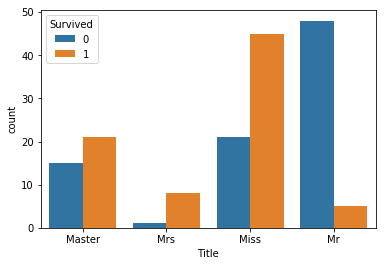

In [39]:
sns.countplot('Title', hue = 'Survived', data=data[data.Age < 20])

но явно голяма разлика за това, което ни интересува няма

In [40]:
data.loc[data.Age.isnull() & (data.Title == 'Mr'), 'Age'] = age_by_title['Mr']
data.loc[data.Age.isnull() & (data.Title == 'Mrs'), 'Age'] = age_by_title['Mrs']
data.loc[data.Age.isnull() & (data.Title == 'Miss'), 'Age'] = age_by_title['Miss']
data.loc[data.Age.isnull() & (data.Title == 'Master'), 'Age'] = age_by_title['Master']
data.loc[data.Age.isnull() & (data.Title == 'Rare'), 'Age'] = age_by_title['Rare']

data.Embarked = data.Embarked.fillna('S')
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
Deck        688
Title         0
dtype: int64

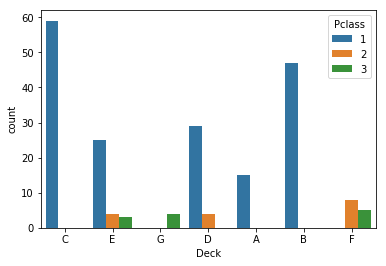

In [41]:
sns.countplot('Deck', hue='Pclass', data=data[data.Deck.notnull()])

наистина първа класа е в A,B и C и въобще не фигурира в G и H (факт, който продължава да не ни помага особено)

In [42]:
data[(data.Fare < 8) & (data.Pclass == 3)].shape

(229, 13)

казват, че стандартния билет за трета класа от тези три пристанища бил около 7 лири, но не е много ясно тук какви са паричните единици

In [43]:
data[(data.Fare < 8) & (data.Survived == 1)].shape

(52, 13)

In [44]:
data[(data.Fare.between(8, 27)) & (data.Survived == 1)].shape

(143, 13)

скокът най-вероятно се получава от това, че тук вече фигурират и хората от другите две класи, които са с по-голма оцеляемост

In [45]:
data[(data.Fare.between(27, 84)) & (data.Survived == 1)].shape

(97, 13)

In [46]:
data[(data.Fare.between(84, 400)) & (data.Survived == 1)].shape

(48, 13)

като абсолютни стойности не е изненадващо, че евтините билетопритежатели оцеляват - видяхме, че трета класа не оцеляват много процентно, но са доминиращите в dataset-a
може би някакво бинване има смисъл. А може би няма и билетите просто са същите като класата

In [47]:
startData = data.copy()

In [48]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Deck', 'Title'],
      dtype='object')

In [49]:
data['IsMale']    = (data.Sex == 'male').astype(float)
data['IsFemale']  = (data.Sex == 'female').astype(float)
data['IsMr']      = (data.Title == 'Mr').astype(float)
data['IsMrs']     = (data.Title == 'Mrs').astype(float)
data['IsMiss']    = (data.Title == 'Miss').astype(float)
data['IsMaster']  = (data.Title == 'Master').astype(float)
data['IsRare']    = (data.Title == 'Rare').astype(float)
data['EmbarkedC'] = (data.Embarked == 'C').astype(float)
data['EmbarkedQ'] = (data.Embarked == 'Q').astype(float)
data['EmbarkedS'] = (data.Embarked == 'S').astype(float)

data = data.drop(['Sex', 'Embarked', 'Title'], axis=1) # селския one-hot от презентацията
data = data.drop(['Name', 'Ticket'], axis=1)
data = data.drop(['Cabin', 'Deck'], axis=1)

In [50]:
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [51]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.835329341317
test score:  0.811659192825


In [52]:
for c in [0.001, 0.003, 0.006, 0.1, 0.3, 0.6, 1.0, 3.0, 6.0]:
    model = LogisticRegression(C=c)
    model.fit(X_train, y_train)
    
    print("C={:f} train: {:f} test: {:f}".format(c, model.score(X_train, y_train), model.score(X_test, y_test)))

C=0.001000 train: 0.684132 test: 0.695067
C=0.003000 train: 0.726048 test: 0.717489
C=0.006000 train: 0.750000 test: 0.748879
C=0.100000 train: 0.811377 test: 0.802691
C=0.300000 train: 0.830838 test: 0.807175
C=0.600000 train: 0.835329 test: 0.816143
C=1.000000 train: 0.835329 test: 0.811659
C=3.000000 train: 0.838323 test: 0.807175
C=6.000000 train: 0.839820 test: 0.802691


c = 0.6 е много малко по-добро (въпреки, че тогава оувърфитваме)

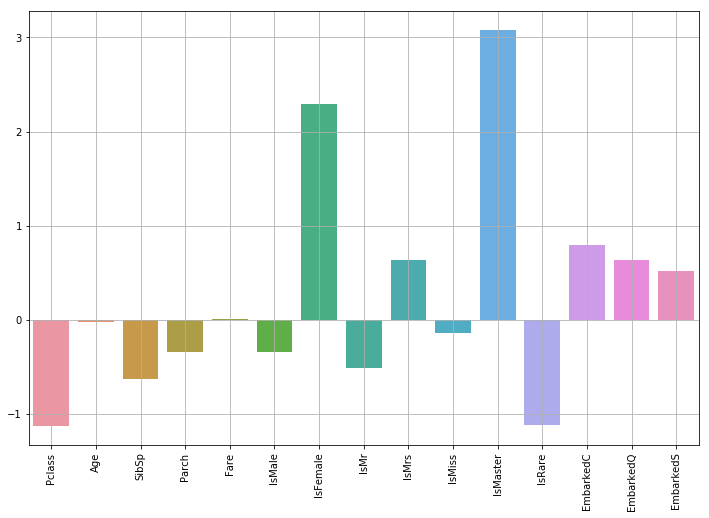

In [53]:
import matplotlib.pyplot as plt

def logistic_regression_features(X, model):
    plt.figure(figsize=(12,8))
    barplot = sns.barplot(x=X.columns, y=model.coef_[0], orient='vertical')
    plt.setp(barplot.get_xticklabels(), rotation=90)
    plt.grid(True)
    
logistic_regression_features(X, model)

може би fare наистина е ненужен, заради класата(която може би все пак е първото нещо, което може да се one-hot encode-не)

In [54]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.973053892216
test score:  0.825112107623


повече от идеален test резултат за нашите цели, но оувърфитва

In [55]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(model, {'n_estimators': [10, 30, 50, 70, 100],
                              'max_depth': [2, 4, 6, 8, 10, 12, 15]})
search.fit(X, y)

pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(10)

,rank_test_score,mean_test_score,params
7,1,0.823793,"{'max_depth': 4, 'n_estimators': 50}"
24,2,0.822671,"{'max_depth': 10, 'n_estimators': 100}"
9,3,0.821549,"{'max_depth': 4, 'n_estimators': 100}"
23,4,0.820426,"{'max_depth': 10, 'n_estimators': 70}"
11,4,0.820426,"{'max_depth': 6, 'n_estimators': 30}"
10,4,0.820426,"{'max_depth': 6, 'n_estimators': 10}"
8,7,0.819304,"{'max_depth': 4, 'n_estimators': 70}"
12,7,0.819304,"{'max_depth': 6, 'n_estimators': 50}"
15,7,0.819304,"{'max_depth': 8, 'n_estimators': 10}"
6,10,0.818182,"{'max_depth': 4, 'n_estimators': 30}"


In [56]:
pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
7,0.074996,0.005482,0.823793,0.835578,4,50,"{'max_depth': 4, 'n_estimators': 50}",1,0.821549,0.845118,0.831650,0.828283,0.818182,0.833333,0.001478,0.001189,5.722805e-03,0.007054
24,0.149049,0.011269,0.822671,0.948373,10,100,"{'max_depth': 10, 'n_estimators': 100}",2,0.797980,0.956229,0.841751,0.947811,0.828283,0.941077,0.002740,0.001369,1.830472e-02,0.006198
9,0.157749,0.009172,0.821549,0.833333,4,100,"{'max_depth': 4, 'n_estimators': 100}",3,0.824916,0.845118,0.828283,0.821549,0.811448,0.833333,0.037490,0.000514,7.273559e-03,0.009622
23,0.099680,0.008000,0.820426,0.950056,10,70,"{'max_depth': 10, 'n_estimators': 70}",4,0.794613,0.959596,0.838384,0.951178,0.828283,0.939394,0.006204,0.000783,1.871305e-02,0.008286
11,0.087846,0.004554,0.820426,0.873737,6,30,"{'max_depth': 6, 'n_estimators': 30}",4,0.811448,0.887205,0.835017,0.867003,0.814815,0.867003,0.015907,0.000575,1.040810e-02,0.009523
10,0.014413,0.001991,0.820426,0.862514,6,10,"{'max_depth': 6, 'n_estimators': 10}",4,0.808081,0.875421,0.838384,0.855219,0.814815,0.856902,0.000575,0.000256,1.299196e-02,0.009152
8,0.127617,0.009202,0.819304,0.834456,4,70,"{'max_depth': 4, 'n_estimators': 70}",7,0.818182,0.845118,0.828283,0.826599,0.811448,0.831650,0.036078,0.002817,6.918534e-03,0.007816
12,0.074961,0.004941,0.819304,0.872615,6,50,"{'max_depth': 6, 'n_estimators': 50}",7,0.808081,0.883838,0.838384,0.861953,0.811448,0.872054,0.018130,0.000336,1.356122e-02,0.008944
15,0.017441,0.001923,0.819304,0.915264,8,10,"{'max_depth': 8, 'n_estimators': 10}",7,0.804714,0.936027,0.848485,0.897306,0.804714,0.912458,0.000903,0.000348,2.063387e-02,0.015932
6,0.054465,0.004443,0.818182,0.835578,4,30,"{'max_depth': 4, 'n_estimators': 30}",10,0.818182,0.846801,0.818182,0.828283,0.818182,0.831650,0.006880,0.000602,1.110223e-16,0.008054


In [57]:
model = RandomForestClassifier(max_depth=4, n_estimators=50, random_state=0).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.838323353293
test score:  0.807174887892


random_state-a много влияе на резултатите. Може би понеже е малък dataset (и понеже вероятно не е много хубаво да разчитаме на това, продължаваме с идеите)

In [58]:
data['Class1'] = (data.Pclass == 1).astype(float)
data['Class2'] = (data.Pclass == 2).astype(float)
data['Class3'] = (data.Pclass == 3).astype(float)
data = data.drop('Pclass', axis=1)

In [59]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.839820359281
test score:  0.816143497758


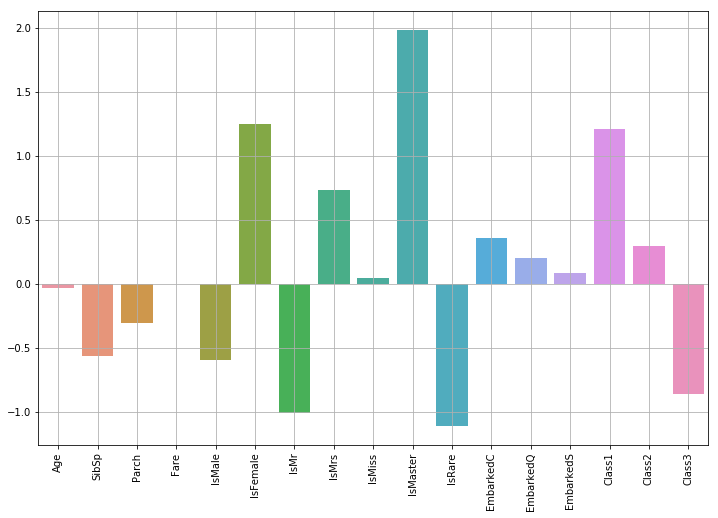

In [60]:
logistic_regression_features(X, model)

fare става все по-безполезен, а Age продължава да си стои такъв. Поради голямата разлика с възрастите на Miss може би все още има приложение (въпреки, че видяхме, че не е голяма зависимост)
можем да опитаме да сложим допълнителна графа за стари хора и да видим какво ще стане (най-малкото за да не повтаряме всичко от презентацията)

In [61]:
data['IsChild'] = (data.Age < 18).astype(float)
data['IsAdult'] = (data.Age.between(18, 50, inclusive=True)).astype(float)
data['IsSeniorCitizen'] = (data.Age > 50).astype(float)

data = data.drop('Age', axis=1)

train score: 0.835329341317
test score:  0.825112107623


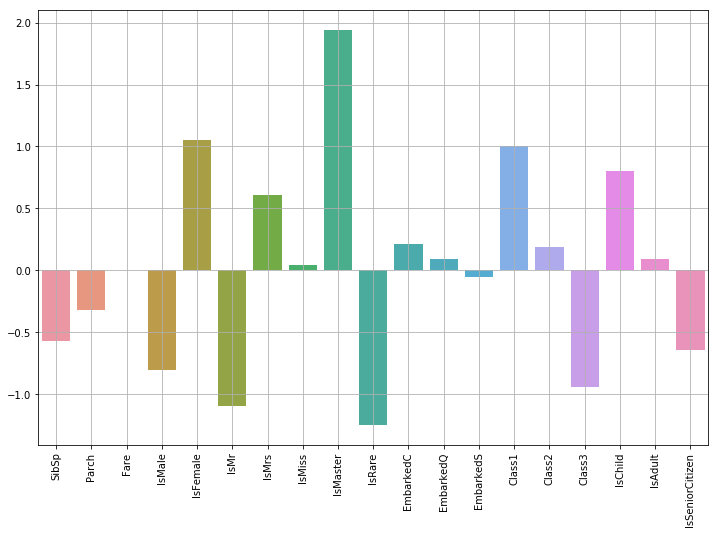

In [62]:
def quickLR(data, random_state = 0):
    X = data.drop('Survived', axis=1)
    y = data['Survived']

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, stratify=y)

    model = LogisticRegression()
    model.fit(X_train, y_train)

    print("train score:", model.score(X_train, y_train))
    print("test score: ", model.score(X_test, y_test))
    
    logistic_regression_features(X, model)
    
quickLR(data)

малко по-устоичиви 0.825, но fare продължава да е безполезен
но на този етап може би ще е най-лесно просто да се оттървем от пола (тъй като титлите го описват, освен ако не си rare)

train score: 0.830838323353
test score:  0.811659192825


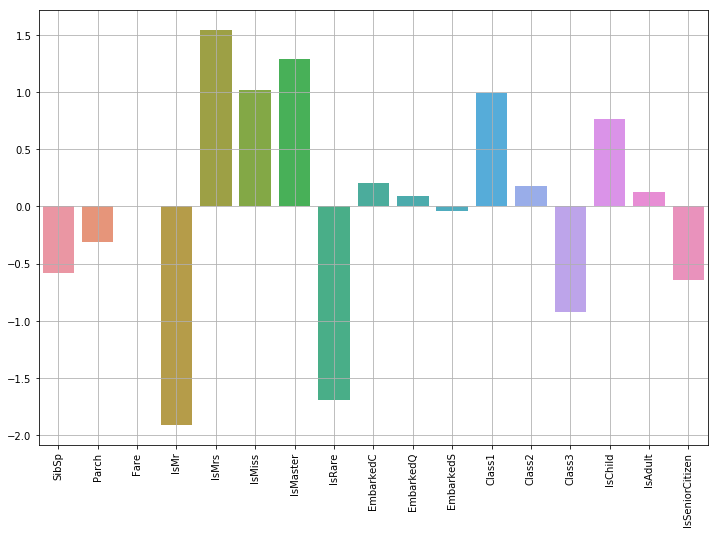

In [63]:
badCallData = data.copy()
data = data.drop(['IsMale', 'IsFemale'], axis=1)
quickLR(data)
data = badCallData

това беше явно лоша идея и затова връщаме нещата до както си бяха
a какво ще стане ако просто махнем fare?

train score: 0.839820359281
test score:  0.820627802691


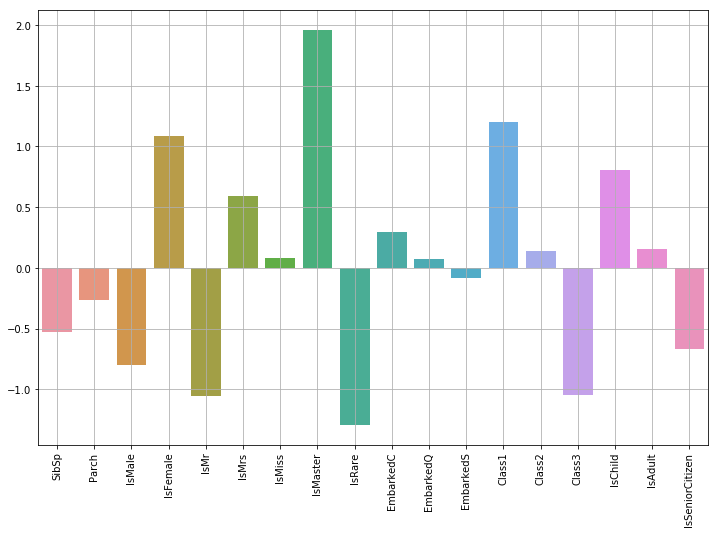

In [64]:
badCallData = data.copy()
data = data.drop(['Fare'], axis=1)
quickLR(data)
data = badCallData

донякъде работеща идея, но пак ни остава опцията да я bin-нем. Можем и SibSp и Parch да bin-нем
но за bin-ването на SibSp и Parch мисля, че в случая имаме прекалено малко хора за истинска статистика с повече от 2-ма или 3-ма човека
можем да пробваме обаче просто да махнем още няколко неща (например Embarked)

train score: 0.836826347305
test score:  0.816143497758


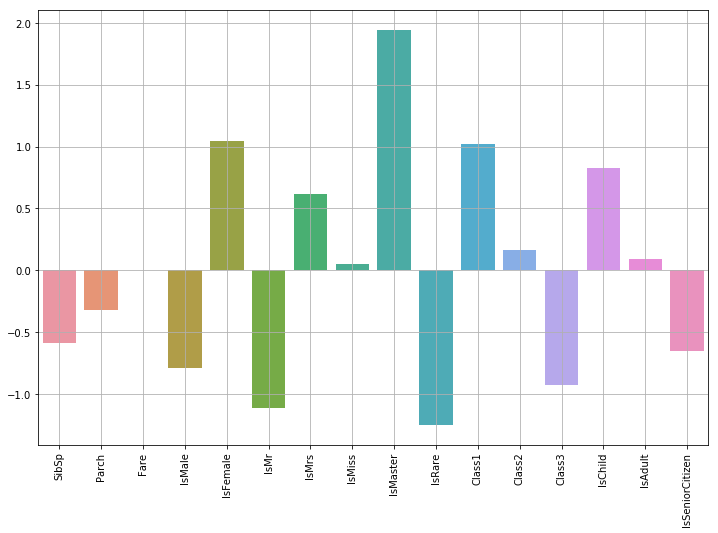

In [65]:
badCallData = data.copy()
data = data.drop(['EmbarkedC', 'EmbarkedQ', 'EmbarkedS'], axis=1)
quickLR(data)
data = badCallData

което явно също се оказа лоша идея (можеше да сработи, понеже бяхме установили, че просто повечето хора на едно от пристанищата бяха предимно жени от първа класа, които са практически безсмъртни)
да биннем fare, тогава, но преди това може да направим още един опит с random forest

In [66]:
model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.965568862275
test score:  0.829596412556


оувърфитваме все още, но поне процентите са малко по-близки (много малко)

In [67]:
search = GridSearchCV(model, {'n_estimators': [10, 30, 50, 70, 100],
                              'max_depth': [2, 4, 6, 8, 10, 12, 15]})
search.fit(X, y)

pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(10)

,rank_test_score,mean_test_score,params
9,1,0.823793,"{'max_depth': 4, 'n_estimators': 100}"
19,2,0.821549,"{'max_depth': 8, 'n_estimators': 100}"
24,3,0.820426,"{'max_depth': 10, 'n_estimators': 100}"
10,3,0.820426,"{'max_depth': 6, 'n_estimators': 10}"
27,5,0.819304,"{'max_depth': 12, 'n_estimators': 50}"
14,5,0.819304,"{'max_depth': 6, 'n_estimators': 100}"
7,7,0.818182,"{'max_depth': 4, 'n_estimators': 50}"
8,7,0.818182,"{'max_depth': 4, 'n_estimators': 70}"
23,7,0.818182,"{'max_depth': 10, 'n_estimators': 70}"
13,7,0.818182,"{'max_depth': 6, 'n_estimators': 70}"


train score: 0.838323353293
test score:  0.820627802691


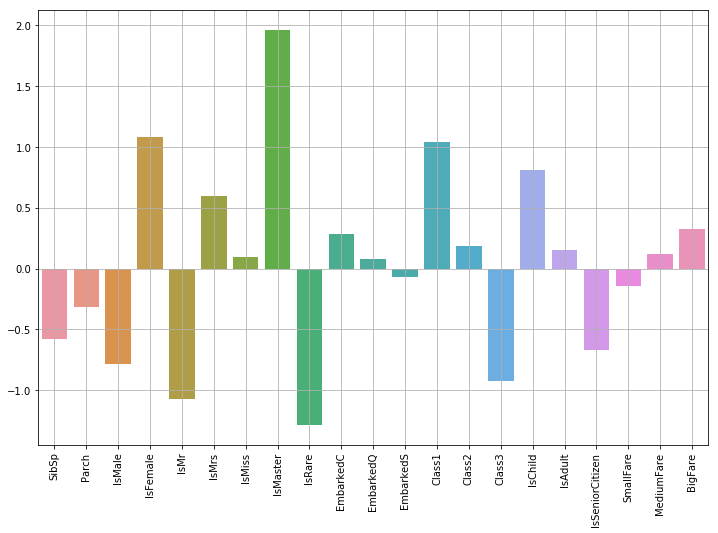

In [68]:
backup = data.copy()

data["SmallFare"] = (data.Fare < 20).astype(float)
data["MediumFare"] = (data.Fare.between(20, 70)).astype(float)
data["BigFare"] = (data.Fare > 70).astype(float)

data = data.drop("Fare", axis = 1)

quickLR(data)

този bin изглежда като стъпка в правилната посока
явно няма да предприемаме отчаяни мерки с Cabin, но може да опитаме някакви дескритизации за sibsp и parch
по отношение на този bin изглежда, че до 1-2 SibSp и Parch -ове са полезни, но по-нататък пречат

train score: 0.833832335329
test score:  0.811659192825


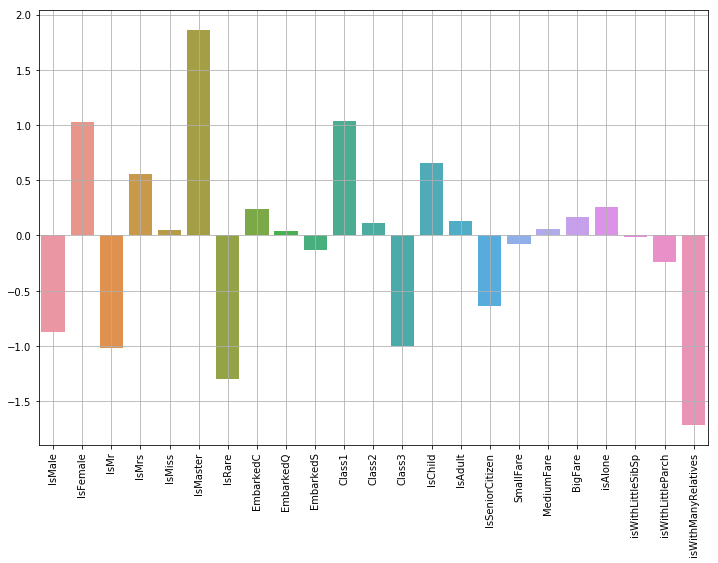

In [69]:
backup = data.copy()

data["isAlone"] = ((data.SibSp == 0) & (data.Parch == 0)).astype(float)
data["isWithLittleSibSp"] = (data.SibSp.between(1, 2, inclusive=True)).astype(float)
data["isWithLittleParch"] = (data.Parch.between(1, 2, inclusive=True)).astype(float)
data["isWithManyRelatives"] = ((data.SibSp > 2) | (data.Parch > 2)).astype(float)

data = data.drop(["SibSp", "Parch"], axis = 1)

quickLR(data)

явно бин-а ни беше лош - можем просто да опитаме този от презентацията

train score: 0.833832335329
test score:  0.816143497758


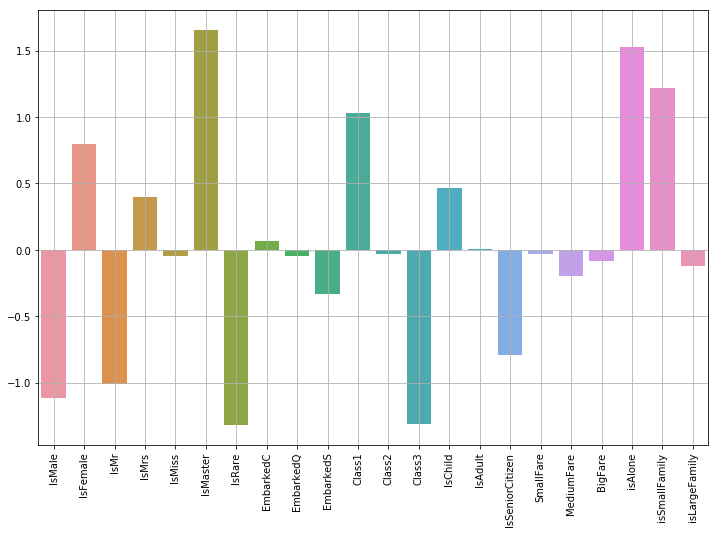

In [70]:
data = backup.copy()

data["isAlone"] = ((data.SibSp + data.Parch) < 1).astype(float)
data["isSmallFamily"] = ((data.SibSp + data.Parch).between(1, 4, inclusive=True)).astype(float)
data["isLargeFamily"] = ((data.SibSp + data.Parch) > 5).astype(float)

data = data.drop(["SibSp", "Parch"], axis = 1)

quickLR(data)

по някаква причина да си сам стана по-голяма оферта от това да си с малко семейство (което явно не е вярно) - по някаква причина и този bin не ни върши работа

In [71]:
data = backup.copy()

In [72]:
model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.965568862275
test score:  0.829596412556


In [73]:
search = GridSearchCV(model, {'n_estimators': [10, 30, 50, 70, 100],
                              'max_depth': [2, 4, 6, 8, 10, 12, 15]})
search.fit(X, y)

pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(10)

,rank_test_score,mean_test_score,params
9,1,0.823793,"{'max_depth': 4, 'n_estimators': 100}"
19,2,0.821549,"{'max_depth': 8, 'n_estimators': 100}"
24,3,0.820426,"{'max_depth': 10, 'n_estimators': 100}"
10,3,0.820426,"{'max_depth': 6, 'n_estimators': 10}"
27,5,0.819304,"{'max_depth': 12, 'n_estimators': 50}"
14,5,0.819304,"{'max_depth': 6, 'n_estimators': 100}"
7,7,0.818182,"{'max_depth': 4, 'n_estimators': 50}"
8,7,0.818182,"{'max_depth': 4, 'n_estimators': 70}"
23,7,0.818182,"{'max_depth': 10, 'n_estimators': 70}"
13,7,0.818182,"{'max_depth': 6, 'n_estimators': 70}"


In [74]:
model = RandomForestClassifier(random_state=0, max_depth=4, n_estimators=100)
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.847305389222
test score:  0.825112107623


може да пробваме да махнем титлите - те може да дублират донякъде възрастите и половете (по-рано опитахме да махнем само половете, но това не сработи много добре, така че големите надежди може би са напразни)

train score: 0.806886227545
test score:  0.793721973094


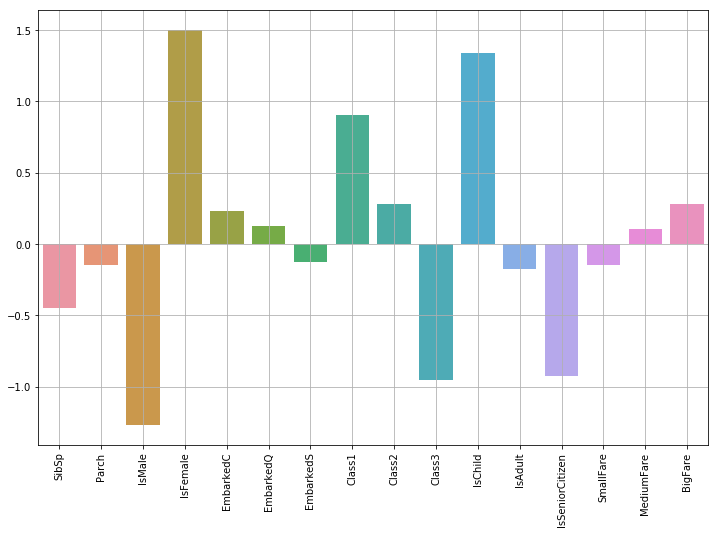

In [75]:
data = data.drop(['IsMaster', 'IsMiss', 'IsMrs', 'IsMr', 'IsRare'], axis = 1)

quickLR(data)

не че сме тръгнали в добра посока, но можем да махнем и Embarked и Fare-овете (заради класите)

train score: 0.811377245509
test score:  0.80269058296
train score: 0.814371257485
test score:  0.780269058296


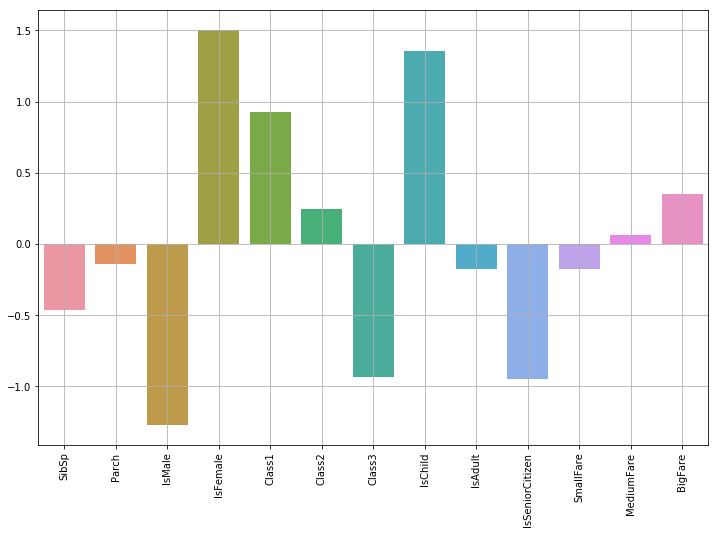

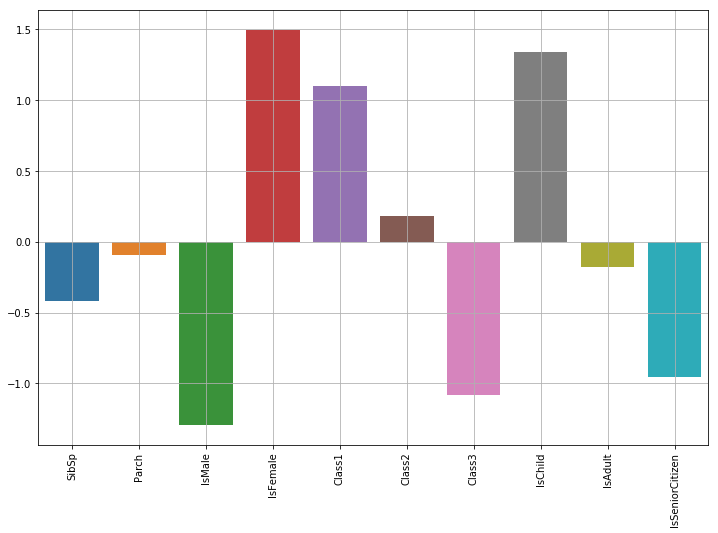

In [76]:
data = data.drop(['EmbarkedC', 'EmbarkedQ', 'EmbarkedS'], axis = 1)

quickLR(data)

data = data.drop(['SmallFare', 'MediumFare', 'BigFare'], axis = 1)

quickLR(data)

може да пробваме и в друг ред

train score: 0.835329341317
test score:  0.811659192825
train score: 0.839820359281
test score:  0.80269058296


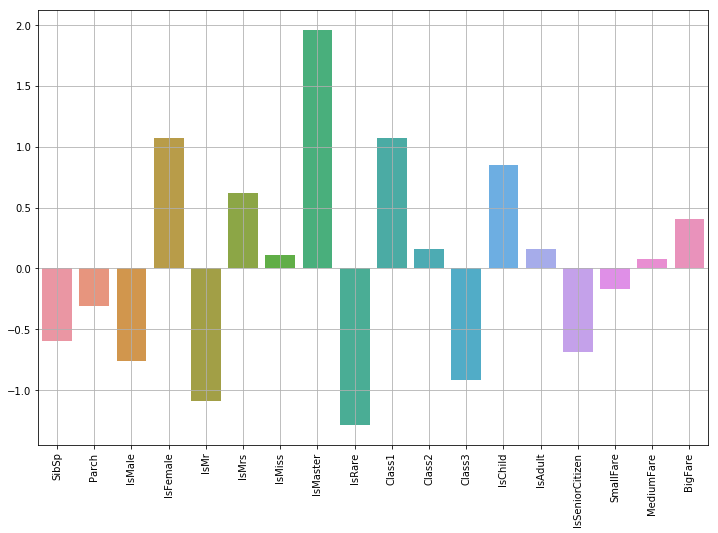

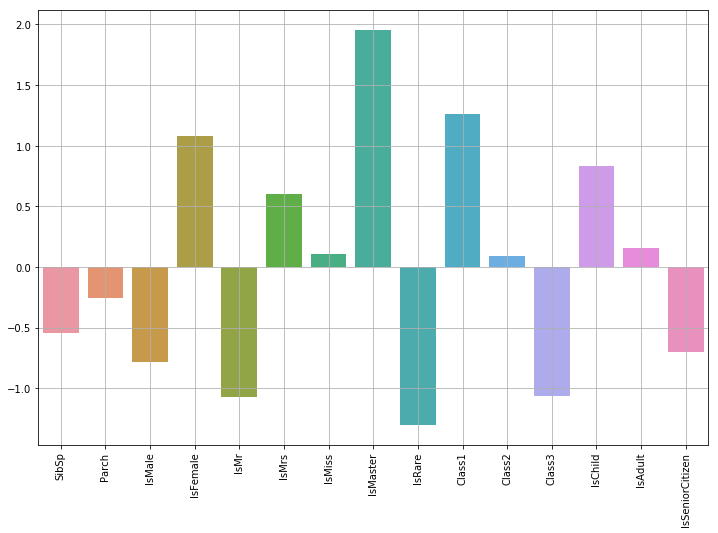

In [77]:
data = backup.copy()

data = data.drop(['EmbarkedC', 'EmbarkedQ', 'EmbarkedS'], axis = 1)

quickLR(data)

data = data.drop(['SmallFare', 'MediumFare', 'BigFare'], axis = 1)

quickLR(data)

но това не се оказа изненадващо интелигентно решение

train score: 0.824850299401
test score:  0.798206278027


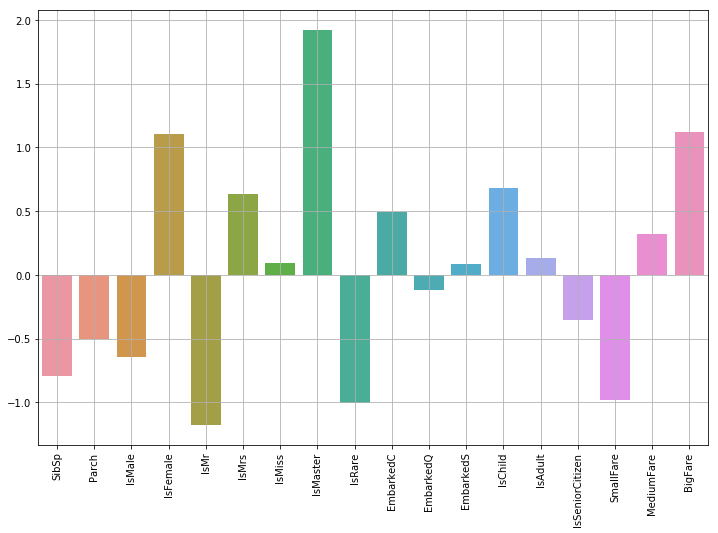

In [78]:
data = backup.copy()

data = data.drop(['Class1', 'Class2', 'Class3'], axis = 1)

quickLR(data)

най-глупавото възможно решение ни удари учудващо малко - явно все пак има някакво дублиране на фийчъри, но аз не мога да го намеря

In [79]:
data = backup.copy()

model = RandomForestClassifier(random_state=0, max_depth=4, n_estimators=100)
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.847305389222
test score:  0.825112107623


някакви номера с кабините вероятно по-скоро биха дублирали класите, пък и видяхме, че там въпроса с оцеляването не показва някакви особени аномалии